In [6]:
import numpy as np
import sys
import matplotlib.pyplot as plt

# For the example, I add '../' to the path to import the module called brenda_lib. 
# You can remove it if you add the folder brenda_lib to your PYTHONPATH.
# e.g. if the brenda_lib repo is in the folder /home/user/ext_libs, add the following line to your .bashrc:
# export PYTHONPATH=$PYTHONPATH:/home/user/ext_libs

sys.path.append('../')
from brenda_lib import cosmo_tools as ct
# For now I will only show how to use this module, I will make other examples later.

%load_ext autoreload
%autoreload 2
# This is to reload the module automatically when you change it.

In [2]:
# Assuming you have access to "/ptmp/mesposito/AletheiaSims/aletheia/cosmology_Aletheia.dat"
# you can initialize the Cosmology class with one of the Aletheia cosmologies with this function:
cosmo = ct.get_cosmo(sim_idx=0, snap=4)    # This is the cosmology of the first Aletheia simulation (LCDM) at z=0.

# You can also initialize the Cosmology class with a custom cosmology, e.g.:
cosmo = ct.Cosmology(omega_cdm = 0.268584094, omega_de = 0.681415906, omega_baryon = 0.05, 
                 hubble = 0.67, ns = 0.96, A_s = None, sigma8 = 0.82755)    
# Here the omegas are the density parameters (capital Omega), forgive me for these bad units, I did it for retrocompatibility with bacco. I will eventually change it.

# If you want to print the parameters of the cosmology, you can find them in cosmo.pars:
print(cosmo.pars)
# This dictionary has both the good physical units and the bad ones, respecitvely starting with 'omega' and 'Omega'.

{'Omega_cdm': 0.268584094, 'Omega_b': 0.05, 'Omega_m': 0.318584094, 'Omega_DE': 0.681415906, 'Om_EdE': False, 'w0': -1, 'wa': 0, 'de_model': 'lcdm', 'sigma8': 0.82755, 'h': 0.67, 'ns': 0.96, 'As': None, 'tau': 0.0952, 'omega_cdm': 0.12056739979660001, 'omega_b': 0.022445000000000007, 'omega_m': 0.14301239979660002, 'omega_de': 0.30588760020340006}


# There is two main things you can do so far with this module

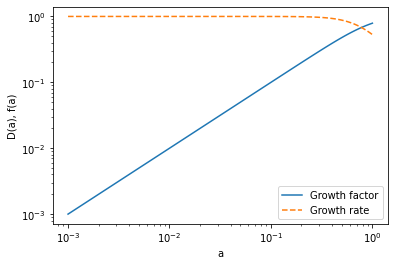

In [4]:
# - Compute the growth factor and the growth rate

a = np.logspace(-3, 0, 100)
D, f = cosmo.compute_growth(a)     
# This is the main function, but if you want only the growth factor or the growth rate, you can use:
D = cosmo.growth_factor(a)
f = cosmo.growth_rate(a)
# Note that a weird error will appear if you only ask for a = 1. I still don't understand why and will fix it later.
# If you want only a = 1, for now just do D = cosmo.growth_factor([0.1, 1])[-1]

plt.loglog(a, D, label='Growth factor')
plt.loglog(a, f, ls='--', label='Growth rate')
plt.xlabel('a')
plt.ylabel('D(a), f(a)')
plt.legend()
plt.show()

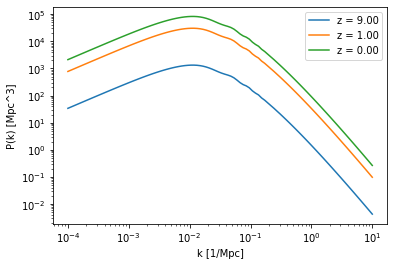

In [20]:
# - Compute the linear power spectrum calling CAMB

k, Pk = cosmo.get_camb_Pk(a=1, mink=1e-4, maxk=10, Mpc_units=True)
# This function returns the wavenumbers k and the power spectrum P(k) at a given scale factor a. If you call it without sepcifying a, it will return the P(k) at the z of the cosmology.
# You can also ask for multiple redshifts at once, only the z = 0 Pk is calculated with CAMB, everything else is rescaled with D**2.
k, Pk = cosmo.get_camb_Pk(a=[0.1, 0.5, 1], mink=1e-4, maxk=10, Mpc_units=True)

for i, a in enumerate([0.1, 0.5, 1]):
    plt.loglog(k, Pk[i], label='z = %.2f' % (1/a - 1))

plt.xlabel('k [1/Mpc]')
plt.ylabel('P(k) [Mpc^3]')
plt.legend()
plt.show()

In [27]:
cosmo.get_camb_Pk(a=1, mink=1e-4, maxk=10, Mpc_units=True)[1].shape

(100,)

knl = 10.66 [1/Mpc]


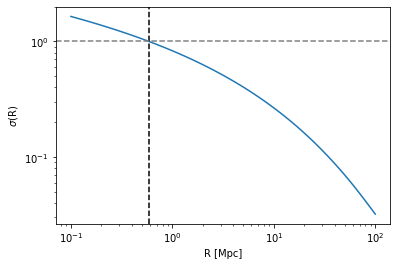

In [29]:
# Using the camb results, you can also compute sigmaR for a given redshift
# If no redshift is specified, it will compute sigmaR at the z of the cosmology.
R = np.logspace(-1, 2, 100)
sigmaR = cosmo.get_sigmaR(R)

# With this information, you can also compute knl, the wavenumber at which the variance of the density field is equal to 1.
knl = cosmo.get_knl()
print('knl = %.2f [1/Mpc]' % knl)

plt.loglog(R, sigmaR)
plt.axvline(2*np.pi/knl, ls='--', c='k')
plt.axhline(1, ls='--', c='grey')
plt.xlabel('R [Mpc]')
plt.ylabel(r'$\sigma$(R)')
plt.show()